In [1]:
%run Reactive_Air_shock_2T_last.py

# Results

Here we presents the results ...

## 11 specie problem

As a first test case we compute the chemical relaxation post-shock at 60 Km of altitude with a free-stream velocity of $u_0 = 6Km/s$, which represents a typical velocity value for the reentry trajectory of space vehicles. The values of temperature and density are taken from the U.S. Standard Atmosphere Air Properties.
The composition of the gas in terms of mass fraction is assumed to be equal to $79\% N_2$ and $21\% O_2$. <br>
All the 11 species and the 47 reactions of Park's model [1] are considered. <br>
The solution is computed for both one-temperature and two-temperature mixture models, then the results are compared and analyzed.

In [2]:
_11specie = problem()

# Add species 
_11specie.add_specie_ic(O2, 0.21)
_11specie.add_specie_ic(N2, 0.79)
_11specie.add_specie_ic(NO,  0.0)
_11specie.add_specie_ic(N,  0)
_11specie.add_specie_ic(O,  0)
_11specie.add_specie_ic(O2p,  0.0)
_11specie.add_specie_ic(NOp,  0.0)
_11specie.add_specie_ic(N2p,  0.0)
_11specie.add_specie_ic(Np,  0.0)
_11specie.add_specie_ic(Op,  0.0)
_11specie.add_specie_ic(em,  0.0)

# Add reactions
_11specie.reaction.append(O2diss)
_11specie.reaction.append(N2diss)
_11specie.reaction.append(NOdiss)
_11specie.reaction.append(NO_O)
_11specie.reaction.append(O_N2)
_11specie.reaction.append(O_O2p)
_11specie.reaction.append(N2_Np)
_11specie.reaction.append(O_NOp )
_11specie.reaction.append(N2_Op)
_11specie.reaction.append(N_NOp)
_11specie.reaction.append(O2_NOp)
_11specie.reaction.append(NOp_N)
_11specie.reaction.append(O___N)
_11specie.reaction.append(O___O)
_11specie.reaction.append(N___N)
_11specie.reaction.append(O_ion)
_11specie.reaction.append(N_ion)

# Set ic
# _11specie.T0     = 300
# _11specie.rho0   = 10 / (287.05 * 300)
# _11specie.u0     = 10000

_11specie.T0     = 273.15 - 26.13 
_11specie.rho0   = 3.097e-4
_11specie.u0     = 6000

### 1 Temperature model

In [3]:
# Solve
_11specie.solve()
_11specie.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.002550900578885017
T      : 13315.518416899495
Tv     : 247.01999999999998
Speed  : 728.4486174730453
Mach   : 0.3385372185853052
******************************
Reference mean free path : 2.1592729644619046e-05



### 2 Temperature model

In [4]:
_11specie_2T = cp.deepcopy(_11specie)
_11specie_2T.solve_2T()
_11specie_2T.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.0018327556843828602
T      : 17531.82154494475
Tv     : 247.01999999999998
Speed  : 1013.8830919112426
Mach   : 0.4200041813142019
******************************
Reference mean free path : 2.1592729644619046e-05



### Plot

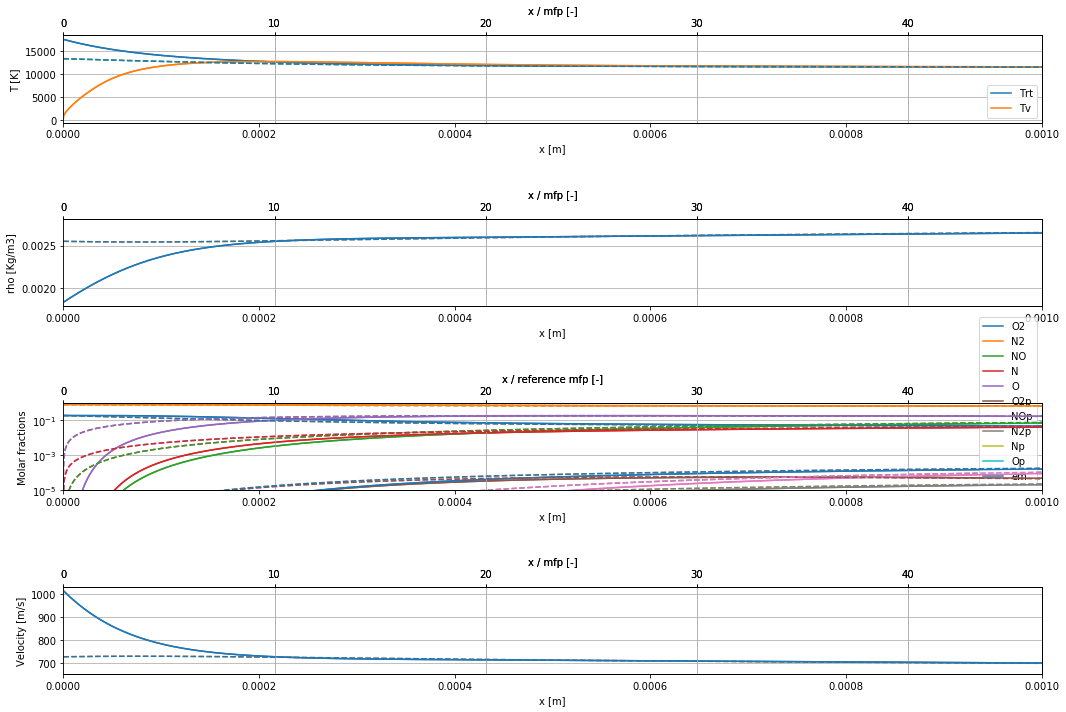

In [5]:
xmax = 1e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

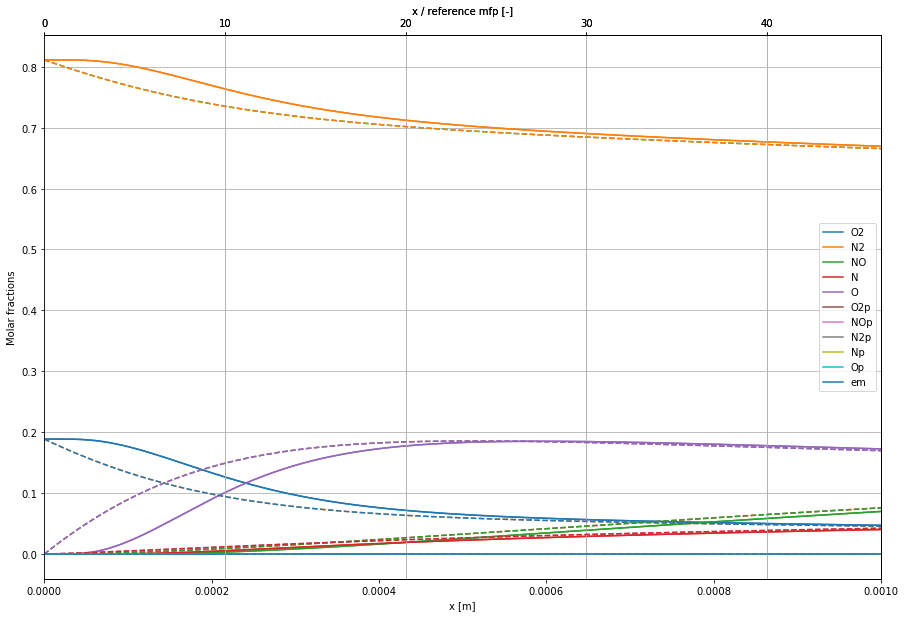

In [12]:
xmax = 1e-3
xmax_l = 3e7

ax = plt.axes()

_11specie_2T.plot_X(ax, xmax = xmax)

_11specie.plot_X(ax, xmax = xmax,ls = '--')

fig.tight_layout()

In [ ]:
ax = plt.axes()
ax.plot(_11specie.sol_x, _11specie.sol_p,'--')
ax.plot(_11specie_2T.sol_x, _11specie_2T.sol_p)
ax.set_xlim(0, 1e-3)

The plot above represents the temperature, density, molar fractions and velocity of the flow. Dotted lines are the solution of the one-temperature model. <br>

```{note}
The flow proprerties reach the equilibrium after less than 50 reference mean free paths. For the hypotesis made the vibrational-electronic temperature past the shock is the same as its pre-shock value. Since all the energy  must be contained either in the kinetic energy term or in the rotational-translational degrees of freedom, the rotational-translational temperature and the velocity are higher than the unique temperature obtained by the one-temperature mixture model and its velocity. Then they all relax until they reach the equilibrium values that is the same of the one temperature model. <br>
While the roto-translational temperature favours heavy particle dissociations and exchange reactions, its contributions is overwhelmed by the lower density, which makes the two-temperature model slower to settle.
```

The flow proprerties reach the equilibrium after less than 50 reference mean free paths. For the hypotesis made the vibrational-electronic temperature past the shock is the same as its pre-shock value. For this reason, the energy jump across the shock will affect mainly the kinetic energy of the flow and its roto-translational temperature, resulting in values higher than those obtained with the one-temperature model. Post-shock speed is rapidly reduced from over $1000 m/s$ to about $730 m/s$ (in 10 reference mean free path) as the kinetic energy is consumed in favor of chemical reactions, leading to an increase of the gas density. Then they all relax until they reach the equilibrium values that is the same of the one temperature model. <br>
While the higher initial roto-translational temperature favors the dissociation of heavy molecules such as N2 and O2 in their N and O components, it can be observed from the plot of the evolution of the molar fractions how the reactions take place later, this is because the contribution given by the lower density leads the 2T model to be slower to settle.

### Validate

The validation plots show that the flux of the conservative variables are constant up to a small tolerance for both misture models.

Maximum mass flux error       : 1.2743367155109934e-11
Maximum momentum flux error   : 1.8302061867015884e-11
Maximum enthalpy flux error   : 7.530491418568231e-06
Maximum mass frac error       : 8.053557820630886e-13
Last value of mass flux       : 1.858200000023658
Ymin                          : 0.0


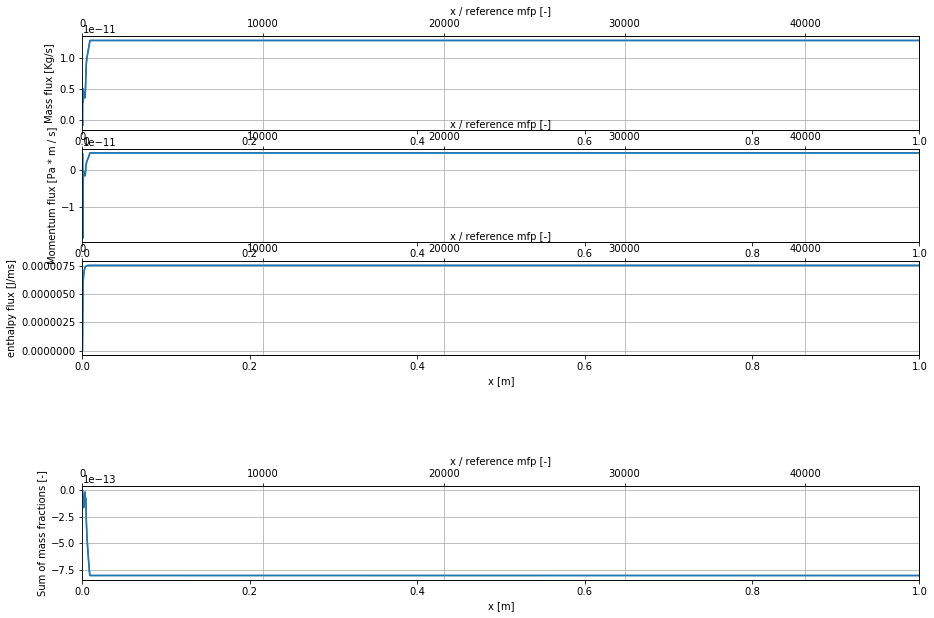

In [13]:
_11specie.validate()

Maximum mass flux error       : 3.36163008837126e-11
Maximum momentum flux error   : 3.3447399890898415e-11
Maximum energy flux error     : 5.468170935252123e-06
Maximum mass frac error       : 3.402833570476105e-13
Last value of mass flux       : 1.8582000000624601
Ymin                          : -3.8923675370333667e-72


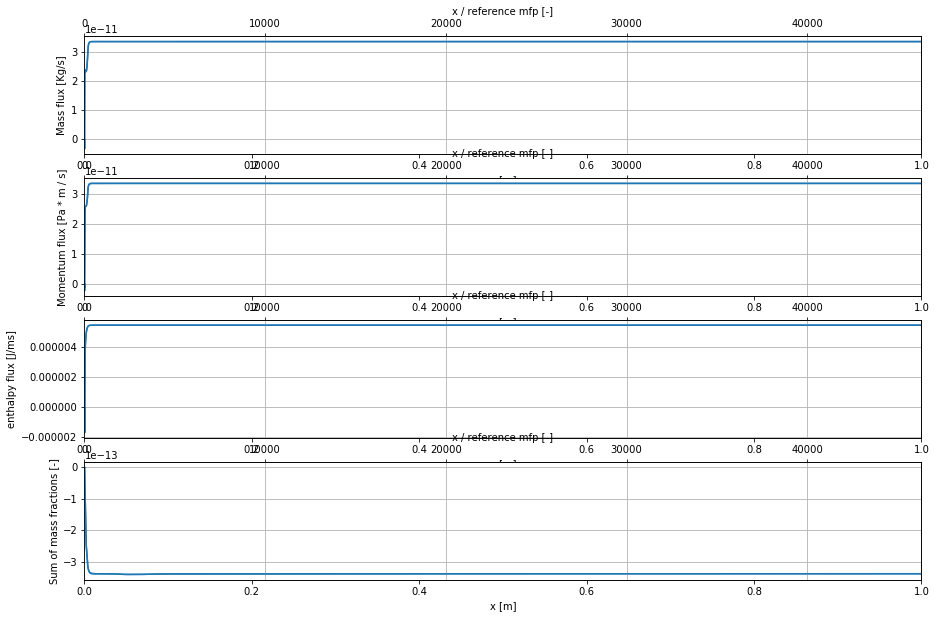

In [14]:
_11specie_2T.validate_2T()

## 7 specie problem

The same problem is studied by 7 species model.

In [15]:
_7specie = problem()

# Add species 
_7specie.add_specie_ic(O2, 0.21)
_7specie.add_specie_ic(N2, 0.79)
_7specie.add_specie_ic(NO,  0.0)
_7specie.add_specie_ic(N,  0)
_7specie.add_specie_ic(O,  0)
_7specie.add_specie_ic(NOp,  0.0)
_7specie.add_specie_ic(em,  0.0)

# Add reactions
_7specie.reaction.append(O2diss_7s)
_7specie.reaction.append(N2diss_7s)
_7specie.reaction.append(NOdiss_7s)
_7specie.reaction.append(NO_O)
_7specie.reaction.append(O_N2)
_7specie.reaction.append(O___N)

# Set ic
_7specie.T0     = _11specie.T0     
_7specie.rho0   = _11specie.rho0 
_7specie.u0     = _11specie.u0

### 1 Temperature model

In [16]:
# Solve
_7specie.solve()
_7specie.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.002550900578885017
T      : 13315.518416899495
Tv     : 247.01999999999998
Speed  : 728.4486174730453
Mach   : 0.3385372185853052
******************************
Reference mean free path : 2.1592729644619046e-05



### 2 Temperature model

In [17]:
_7specie_2T = cp.deepcopy(_7specie)
_7specie_2T.solve_2T()
_7specie_2T.postprocess()

Pre shock Mach : 18.977626837981823
******************************
Post-shock guess values:
rho    : 0.0018327556843828609
T      : 17531.821544944738
Speed  : 1013.883091911242
Mach   : 0.380654589983921
******************************
Post-shock values:
rho    : 0.0018327556843828602
T      : 17531.82154494475
Tv     : 247.01999999999998
Speed  : 1013.8830919112426
Mach   : 0.4200041813142019
******************************
Reference mean free path : 2.1592729644619046e-05



### Plot

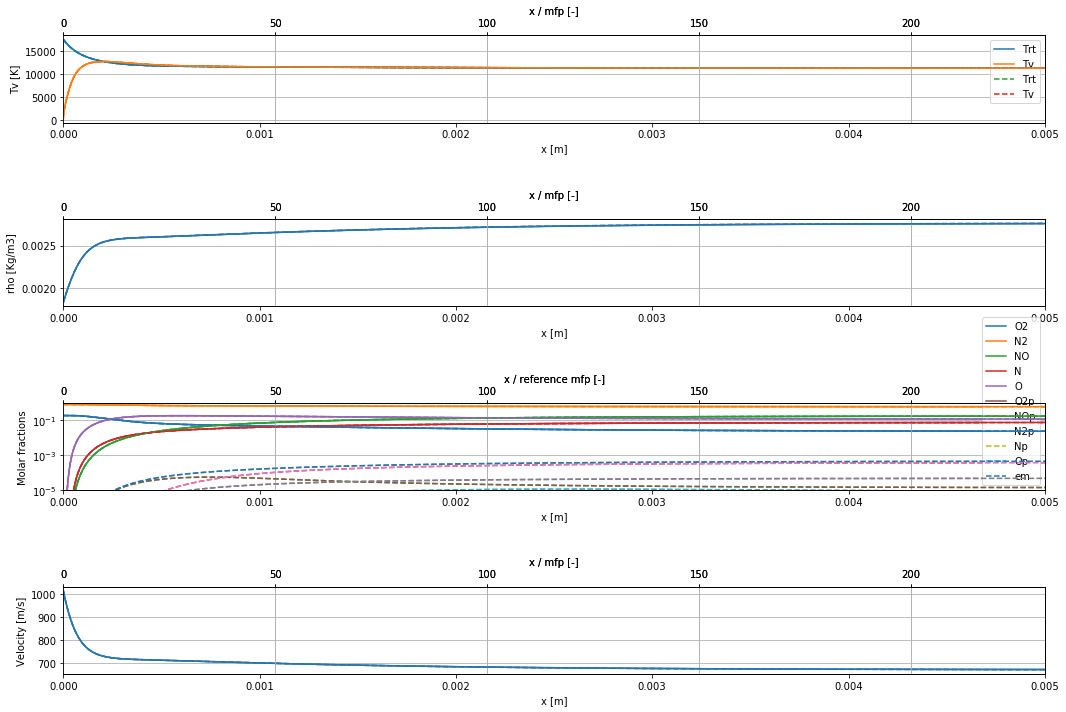

In [18]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie_2T.plot_2T(ax[0], xmax = xmax)
_7specie_2T.plot_rho(ax[1], xmax = xmax)
_7specie_2T.logplot_X(ax[2], xmax = xmax)
_7specie_2T.plot_u(ax[3], xmax = xmax)

_11specie_2T.plot_2T(ax[0], xmax = xmax,ls = '--')
_11specie_2T.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie_2T.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie_2T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

For the condition considered there is no remarkable difference between the two models but in the molar fractions, where the 11 species model allows production of small amounts of ionized molecules.

## Effect of altitude (density)

### Lower altitude (higher density)

To study how the flow in the relaxation zone behaves if the pre-shock mach number is about the same but the average molecular free path is lower, a flow with free-stream velocity of 6 km/s (typical value of space vehicles re-enry velocity) is analyzed but with the conditions of density and temperature at 40 Km altitude.

In [19]:
low_altitude = cp.deepcopy(_11specie)
# low_altitude.rho0 = 100 * _11specie.rho0

# at 40 Km of altitude
low_altitude.T0 = 273.15 - 22.8
low_altitude.rho0 = 3.996e-3
low_altitude.u0 = _11specie.u0

low_altitude.solve()
low_altitude.postprocess()

Pre shock Mach : 18.850990022482666
******************************
Post-shock guess values:
rho    : 0.02364333250562184
T      : 17534.963959261022
Speed  : 1014.0702455670773
Mach   : 0.3806907392903729
******************************
Post-shock values:
rho    : 0.03290941899249966
T      : 13317.44513933993
Tv     : 250.34999999999997
Speed  : 728.5452230397748
Mach   : 0.33856225872955314
******************************
Reference mean free path : 1.673799494555518e-06



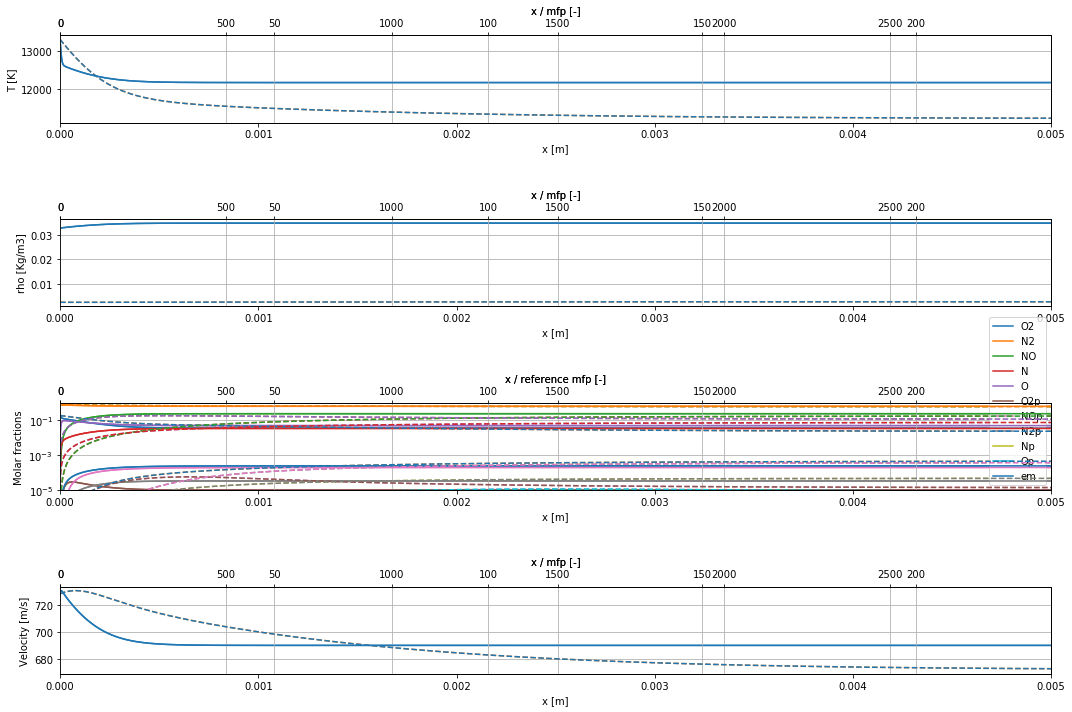

In [24]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

low_altitude.plot_T(ax[0], xmax = xmax)
low_altitude.plot_rho(ax[1], xmax = xmax)
low_altitude.logplot_X(ax[2], xmax = xmax)
low_altitude.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

While the effect of a different mixture model can be compared in the same spatial coordinates, increasing at different altitudes (densities) the post-shock conditions are different and in particular the mean free path, thus the relaxation length, is significantly reduced. However, the number of mean free path that lead to relaxation is expected to be the same, hence a more appropriate spatial coordinate to compare the results in the distance measured as number of reference mean free path.

While the values of velocity and temperature of the post-shock flow are very similar, their evolution as well as density values are noticeably different. The free mean molecular path is smaller, as well as the average collision time, which leads to a shorter relaxation region. To allow a more appropriate comparison, results are compared on a spatial coordiante scaled on mean free paths.

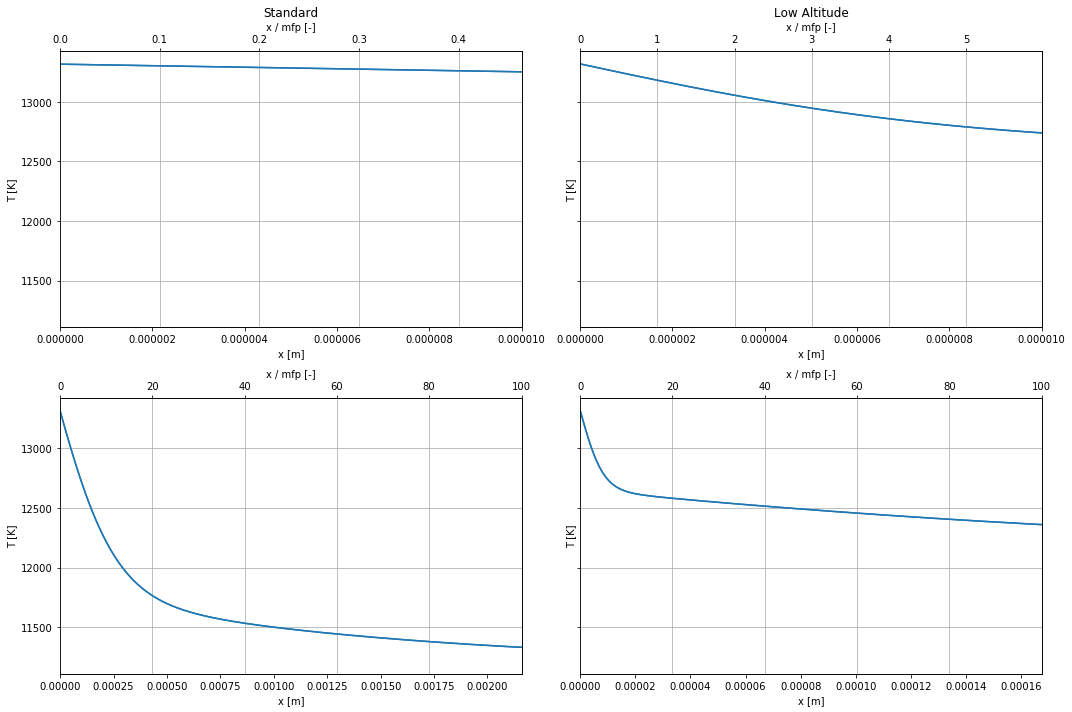

In [21]:
xmax = 1e-5
xmax_l = 1e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie.plot_T(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

low_altitude.plot_T(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Low Altitude')

_11specie.plot_T(ax[1,0], xmax_l = xmax_l)

low_altitude.plot_T(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

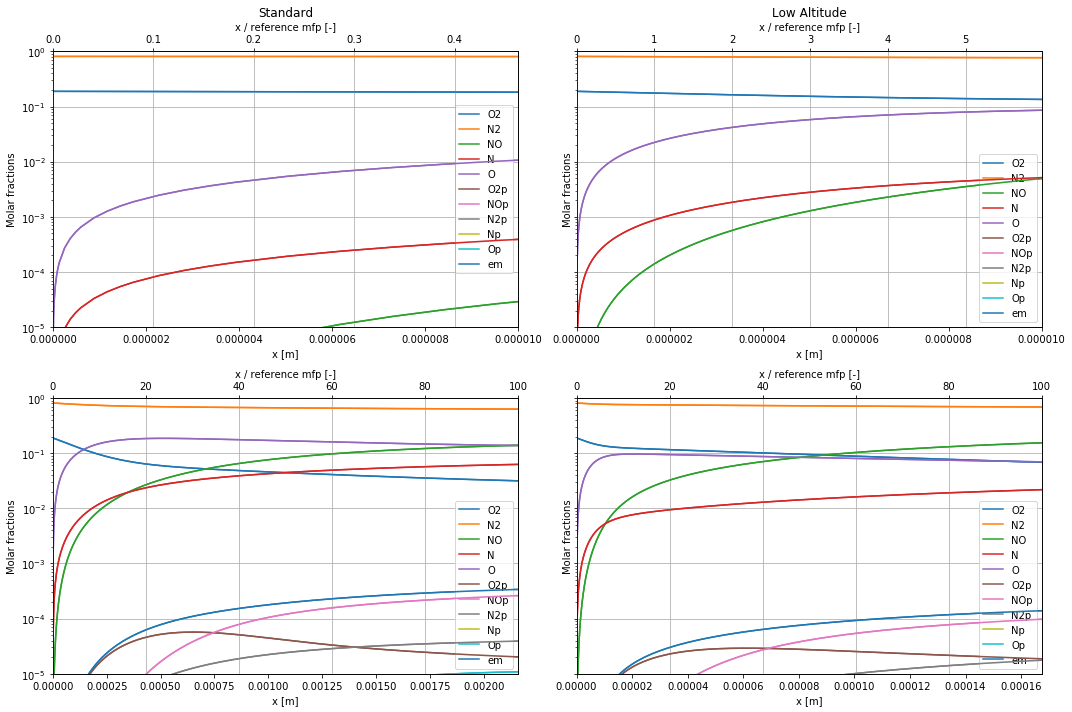

In [22]:
fig, ax = plt.subplots(2,2, sharey = True)

_11specie.logplot_X(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

low_altitude.logplot_X(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Low Altitude')

_11specie.logplot_X(ax[1,0], xmax_l = xmax_l)

low_altitude.logplot_X(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

### Higher altitude (density)

In [25]:
high_altitude = cp.deepcopy(_11specie)

# at 80 Km of altitude
high_altitude.T0 = 273.15 - 74.51
high_altitude.rho0 = 1.846e-5
high_altitude.u0 = _11specie.u0

high_altitude.solve()
high_altitude.postprocess()

Pre shock Mach : 21.162872144357774
******************************
Post-shock guess values:
rho    : 0.00010953712483461731
T      : 17486.162983264207
Speed  : 1011.1640246832204
Mach   : 0.3801290496550789
******************************
Post-shock values:
rho    : 0.00015234301903586223
T      : 13287.505690929016
Tv     : 198.64
Speed  : 727.0434884447383
Mach   : 0.3381727767484634
******************************
Reference mean free path : 0.00036128571073294367



## Effect of temperature

The post-shock temperature depends mainly on the pre-shock Mach number since the pre-shock thermal energy is much smaller than the kinetic energy of the flow in hypersonic flows, thus the effect of temperature is insignificant but for the relaxation length of the vibrational temperature in the 2 temperature model and the reactions that depend strongly on that temperature such as electron impacts.

In [ ]:
low_T = cp.deepcopy(_11specie_2T)
low_T.T0 = _11specie.T0 / 2
low_T.solve_2T()
low_T.postprocess()

In [ ]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

low_T.plot_2T(ax[0], xmax = xmax,ls = '--')
low_T.plot_rho(ax[1], xmax = xmax,ls = '--')
low_T.logplot_X(ax[2], xmax = xmax,ls = '--')
low_T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

### Queensland expansion tube [3]

A further case study considered is that reported in Expermental Methods for Studying Post Shock Relaxation [3]. In this case, a hypersonic flow at high temperature and low density that simulates a re-entry into the Earth’s atmosphere is analyzed. This case was chosen because it allows to analyze how the flow behaves in the relaxation region under extreme temperature conditions (and very high pre-shock mach number).

#### 11 specie problem

In [ ]:
_11specie_Q = cp.deepcopy(_11specie)
_11specie_Q.T0     = 2242
_11specie_Q.rho0   = 2.284148e-4  #147/287.05/2242
_11specie_Q.u0     = 11102.5      #11.3*np.sqrt(1.4*287*2242) perchè non usiamo 9840 come nel paper?

_11specie_Q.solve_2T()
_11specie_Q.postprocess()

Pre shock Mach : 11.656272418316417
******************************
Post-shock guess values:
rho    : 0.0013218446040398329
T      : 61346.35174387339
Speed  : 1918.5124403046552
Mach   : 0.38505871793360874
******************************
Post-shock values:
rho    : 0.001321844604039832
T      : 61346.35174387341
Tv     : 2242
Speed  : 1918.5124403046564
Mach   : 0.40583674168487144
******************************
Reference mean free path : 2.9938615989028435e-05



In [ ]:
xmax = 1e-3
xmax_l = 1e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie_2T.plot_T(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

_11specie_Q.plot_T(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Queensland expansion tube')

_11specie_2T.plot_T(ax[1,0], xmax_l = xmax_l)

_11specie_Q.plot_T(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

In [ ]:
xmax = 1e-3
xmax_l = 1e2

fig, ax = plt.subplots(2,2, sharey = True)

_11specie_2T.logplot_X(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

_11specie_Q.logplot_X(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Queensland expansion tube')

_11specie_2T.logplot_X(ax[1,0], xmax_l = xmax_l)

_11specie_Q.logplot_X(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

#### 7 specie problem

In [ ]:
_7specie_Q = cp.deepcopy(_7specie)
_7specie_Q.T0     = 2242
_7specie_Q.rho0   = 2.284148e-4  #147/287.05/2242
_7specie_Q.u0     = 11102.5      #11.3*np.sqrt(1.4*287*2242) perchè non usiamo 9840 come nel paper?

_7specie_Q.solve_2T()
_7specie_Q.postprocess()

In [ ]:
xmax = 1e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie_Q.plot_2T(ax[0], xmax = xmax)
_7specie_Q.plot_rho(ax[1], xmax = xmax)
_7specie_Q.logplot_X(ax[2], xmax = xmax)
_7specie_Q.plot_u(ax[3], xmax = xmax)

_7specie_2T.plot_2T(ax[0], xmax = xmax,ls = '--')
_7specie_2T.plot_rho(ax[1], xmax = xmax,ls = '--')
_7specie_2T.logplot_X(ax[2], xmax = xmax,ls = '--')
_7specie_2T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()